In [1]:
#!/usr/bin/env python
# coding: utf-8
# Author: Nelson Fernandez, Renault Research
# nelson.fernandez-pinto@renault.com

import sys,os
sys.path.append(os.getcwd())

# Imports
from dataset import *
from architectures import *
#from functions import *
from losses import *
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 
%matplotlib inline

import torch
import torch.nn.functional as F
from torch.optim import Adam
from torch.autograd import Variable
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(7)


# Generate dataset
me = MazeExplorer(maze_size=(64,64), nbr_instances=30, 
                  difficulty='easy', nbr_trajectories=2,
                  alpha=17)

# Show deopping percentages
me.get_dopping_percentage()  # point level
me.get_dopping_percentage_trajectories() # trajectory level

# Create CNN model
net = ConvNet().to(device)
print('CNN created...')


# Get set of train/test INDEXES (hacking SKlean train_test_split)
x = np.arange(0, me.len())
train_indexes, test_indexes, _, _ = train_test_split(x, x, 
                                                    test_size=0.33, 
                                                    random_state=7)


# Wrap transforming function to dataset object
t_me = TransformedDataset(me, xy_transform=xy_transform)

# Get training/test subsets
train_me = Subset(t_me, indices=train_indexes)
test_me = Subset(t_me, indices=test_indexes)

# Configure dataloaders
batch_size = 1
num_workers = 4

trainloader = DataLoader(train_me, shuffle=True, 
                          batch_size=batch_size, 
                          num_workers=num_workers, 
                          pin_memory=True)


testloader = DataLoader(test_me, shuffle=True, 
                         batch_size=batch_size, 
                         num_workers=1,
                         pin_memory=True)

print('Train test data loaders created...')

# Init losses
rmse = RMSELoss()
graphic_loss = GraphicLoss()
road_loss = RoadLoss(k1=0.1)

# Set optimizer (Adam)
optimizer = Adam(net.parameters(), lr=1e-3)
epochs = 200
print('Losses and optimizer created...')




100%|██████████| 30/30 [00:00<00:00, 1242.63it/s]

Creating MazeExplorer dataset of difficulty easy
Using Prims generator
Using shortest path solver



 18%|█▊        | 22/120 [00:00<00:00, 214.85it/s]

Dataset generated... 120 available instances


 38%|███▊      | 45/120 [00:00<00:00, 446.01it/s]

Estimated dopping percentage (points) =  0.118


100%|██████████| 120/120 [00:00<00:00, 426.15it/s]


Estimated dopping percentage (trajectories)=  1.667
CNN created...
Train test data loaders created...
Losses and optimizer created...


Init training loop...


/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Train Epoch: 1 [79/80 (99%)] EnvLoss: 0.021557  RMSELoss: 18.548178 TotalLoss: 18.548178


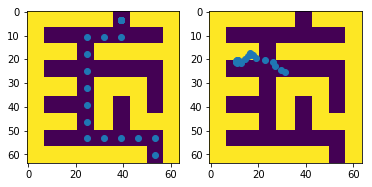

Train Epoch: 2 [79/80 (99%)] EnvLoss: 0.030192  RMSELoss: 16.854496 TotalLoss: 16.854496


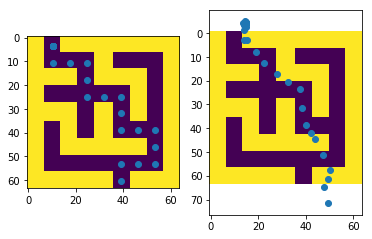

Train Epoch: 3 [79/80 (99%)] EnvLoss: 0.019451  RMSELoss: 15.200070 TotalLoss: 15.200070


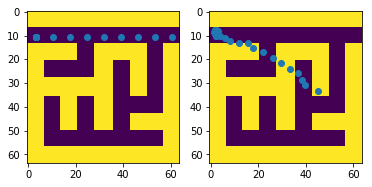

Train Epoch: 4 [79/80 (99%)] EnvLoss: 0.024761  RMSELoss: 14.213829 TotalLoss: 14.213829


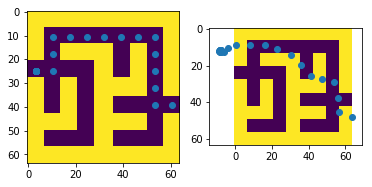

Train Epoch: 5 [79/80 (99%)] EnvLoss: 0.053512  RMSELoss: 12.053759 TotalLoss: 12.053759


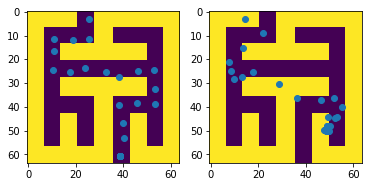

Train Epoch: 6 [79/80 (99%)] EnvLoss: 0.046243  RMSELoss: 11.299148 TotalLoss: 11.299148


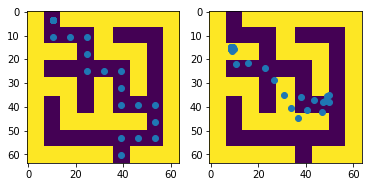

Train Epoch: 7 [79/80 (99%)] EnvLoss: 0.047679  RMSELoss: 10.872681 TotalLoss: 10.872681


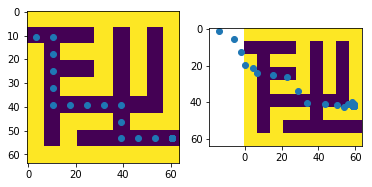

Train Epoch: 8 [79/80 (99%)] EnvLoss: 0.049231  RMSELoss: 9.153897 TotalLoss: 9.153897


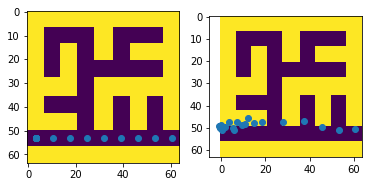

Train Epoch: 9 [79/80 (99%)] EnvLoss: 0.047249  RMSELoss: 9.192349 TotalLoss: 9.192349


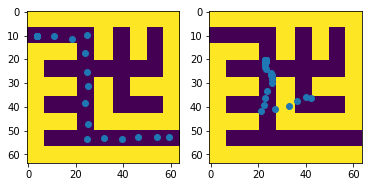

Train Epoch: 10 [79/80 (99%)] EnvLoss: 0.048039  RMSELoss: 8.851106 TotalLoss: 8.851106


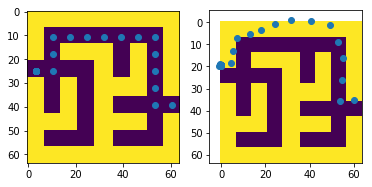

Train Epoch: 11 [79/80 (99%)] EnvLoss: 0.041824  RMSELoss: 8.954166 TotalLoss: 8.954166


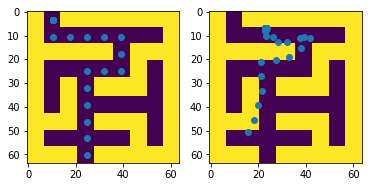

Train Epoch: 12 [79/80 (99%)] EnvLoss: 0.062143  RMSELoss: 7.834285 TotalLoss: 7.834285


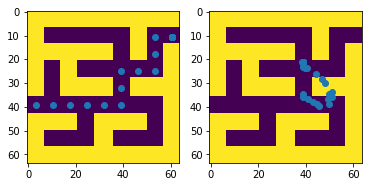

Train Epoch: 13 [79/80 (99%)] EnvLoss: 0.047452  RMSELoss: 8.567325 TotalLoss: 8.567325


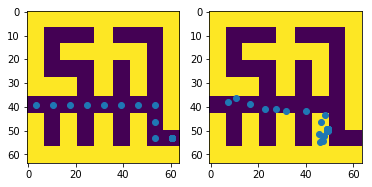

Train Epoch: 14 [79/80 (99%)] EnvLoss: 0.028206  RMSELoss: 7.946067 TotalLoss: 7.946067


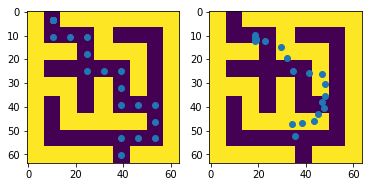

Train Epoch: 15 [79/80 (99%)] EnvLoss: 0.061109  RMSELoss: 7.299994 TotalLoss: 7.299994


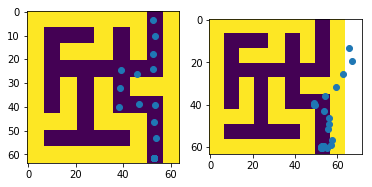

Train Epoch: 16 [79/80 (99%)] EnvLoss: 0.055402  RMSELoss: 6.831411 TotalLoss: 6.831411


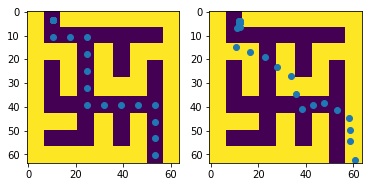

Train Epoch: 17 [79/80 (99%)] EnvLoss: 0.054671  RMSELoss: 7.123427 TotalLoss: 7.123427


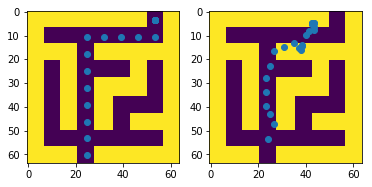

Train Epoch: 18 [79/80 (99%)] EnvLoss: 0.091427  RMSELoss: 7.498612 TotalLoss: 7.498612


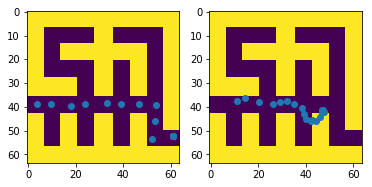

Train Epoch: 19 [79/80 (99%)] EnvLoss: 0.048707  RMSELoss: 6.881908 TotalLoss: 6.881908


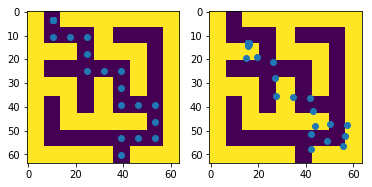

Train Epoch: 20 [79/80 (99%)] EnvLoss: 0.029120  RMSELoss: 6.666086 TotalLoss: 6.666086


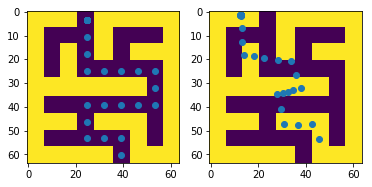

Train Epoch: 21 [79/80 (99%)] EnvLoss: 0.024128  RMSELoss: 6.436239 TotalLoss: 6.436239


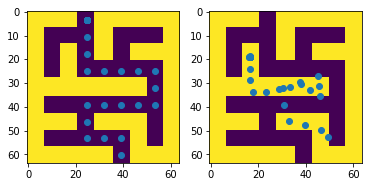

Train Epoch: 22 [79/80 (99%)] EnvLoss: 0.038380  RMSELoss: 6.378212 TotalLoss: 6.378212


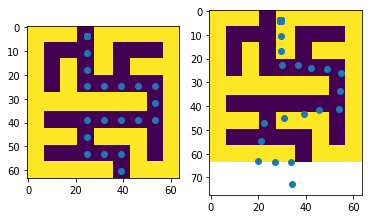

Train Epoch: 23 [79/80 (99%)] EnvLoss: 0.057992  RMSELoss: 6.474464 TotalLoss: 6.474464


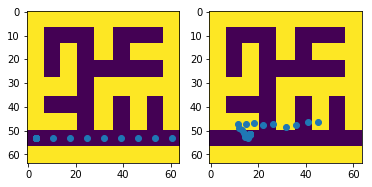

Train Epoch: 24 [79/80 (99%)] EnvLoss: 0.071148  RMSELoss: 6.276956 TotalLoss: 6.276956


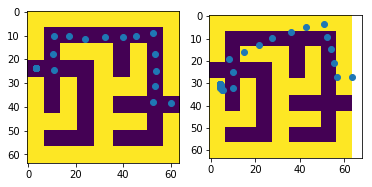

Train Epoch: 25 [79/80 (99%)] EnvLoss: 0.037194  RMSELoss: 6.610441 TotalLoss: 6.610441


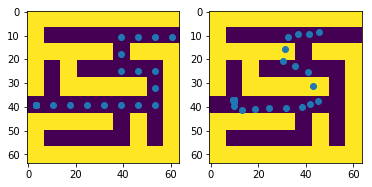

Train Epoch: 26 [79/80 (99%)] EnvLoss: 0.021031  RMSELoss: 6.001633 TotalLoss: 6.001633


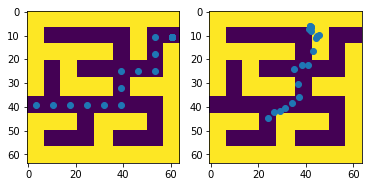

Train Epoch: 27 [79/80 (99%)] EnvLoss: 0.064800  RMSELoss: 5.907007 TotalLoss: 5.907007


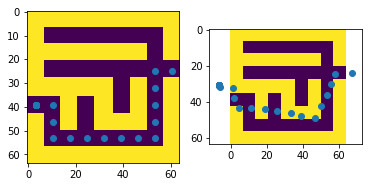

Train Epoch: 28 [79/80 (99%)] EnvLoss: 0.036858  RMSELoss: 6.302562 TotalLoss: 6.302562


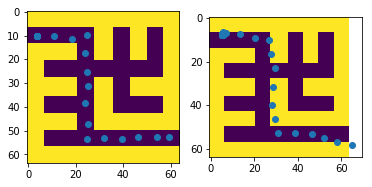

Train Epoch: 29 [79/80 (99%)] EnvLoss: 0.041245  RMSELoss: 6.098726 TotalLoss: 6.098726


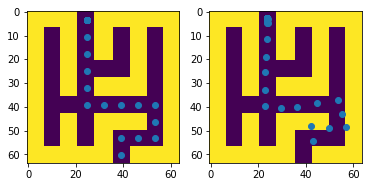

Train Epoch: 30 [79/80 (99%)] EnvLoss: 0.025724  RMSELoss: 6.238035 TotalLoss: 6.238035


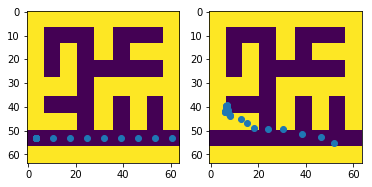

Train Epoch: 31 [79/80 (99%)] EnvLoss: 0.047111  RMSELoss: 5.981076 TotalLoss: 5.981076


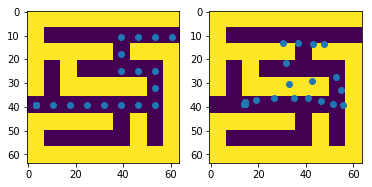

Train Epoch: 32 [79/80 (99%)] EnvLoss: 0.064479  RMSELoss: 5.571586 TotalLoss: 5.571586


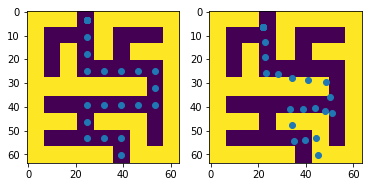

Train Epoch: 33 [79/80 (99%)] EnvLoss: 0.036772  RMSELoss: 6.097933 TotalLoss: 6.097933


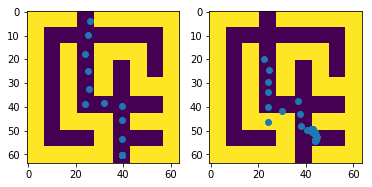

Train Epoch: 34 [79/80 (99%)] EnvLoss: 0.039103  RMSELoss: 5.724790 TotalLoss: 5.724790


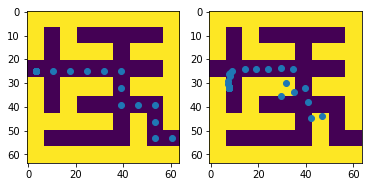

Train Epoch: 35 [79/80 (99%)] EnvLoss: 0.035121  RMSELoss: 5.345217 TotalLoss: 5.345217


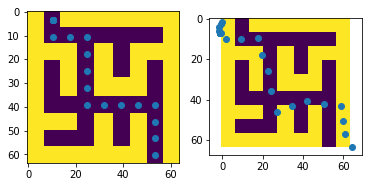

Train Epoch: 36 [79/80 (99%)] EnvLoss: 0.038666  RMSELoss: 5.590937 TotalLoss: 5.590937


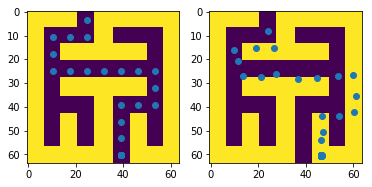

Train Epoch: 37 [79/80 (99%)] EnvLoss: 0.037397  RMSELoss: 4.899335 TotalLoss: 4.899335


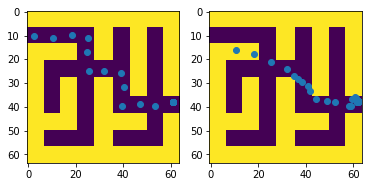

Train Epoch: 38 [79/80 (99%)] EnvLoss: 0.035225  RMSELoss: 4.861359 TotalLoss: 4.861359


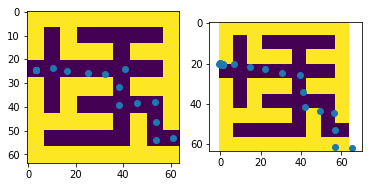

Train Epoch: 39 [79/80 (99%)] EnvLoss: 0.037675  RMSELoss: 5.964503 TotalLoss: 5.964503


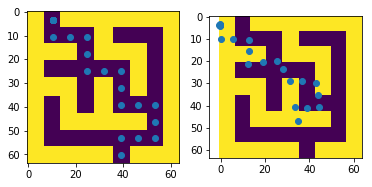

Train Epoch: 40 [79/80 (99%)] EnvLoss: 0.053352  RMSELoss: 5.176089 TotalLoss: 5.176089


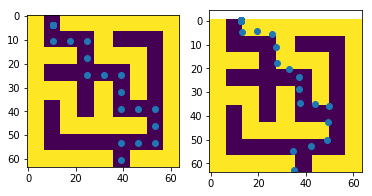

Train Epoch: 41 [79/80 (99%)] EnvLoss: 0.063743  RMSELoss: 5.650353 TotalLoss: 5.650353


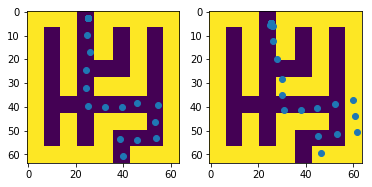

Train Epoch: 42 [79/80 (99%)] EnvLoss: 0.050556  RMSELoss: 5.447831 TotalLoss: 5.447831


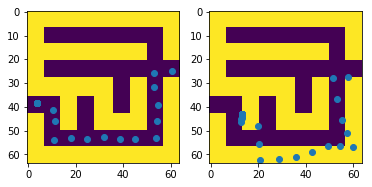

Train Epoch: 43 [79/80 (99%)] EnvLoss: 0.078679  RMSELoss: 4.872759 TotalLoss: 4.872759


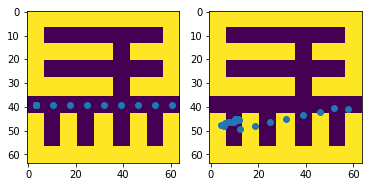

Train Epoch: 44 [79/80 (99%)] EnvLoss: 0.024282  RMSELoss: 4.670717 TotalLoss: 4.670717


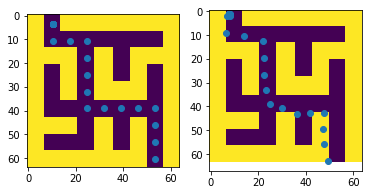

Train Epoch: 45 [79/80 (99%)] EnvLoss: 0.042703  RMSELoss: 5.166142 TotalLoss: 5.166142


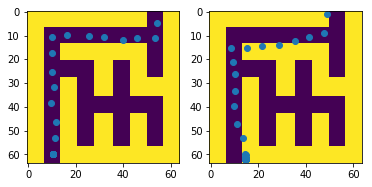

Train Epoch: 46 [79/80 (99%)] EnvLoss: 0.024044  RMSELoss: 4.950639 TotalLoss: 4.950639


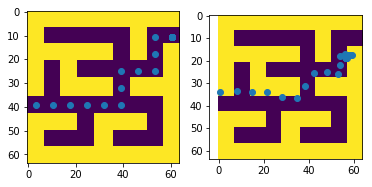

Train Epoch: 47 [79/80 (99%)] EnvLoss: 0.039289  RMSELoss: 5.001204 TotalLoss: 5.001204


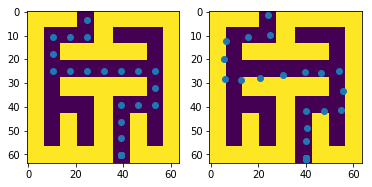

Train Epoch: 48 [79/80 (99%)] EnvLoss: 0.059022  RMSELoss: 5.202624 TotalLoss: 5.202624


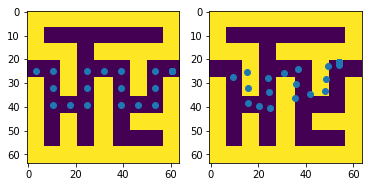

Train Epoch: 49 [79/80 (99%)] EnvLoss: 0.064454  RMSELoss: 5.796374 TotalLoss: 5.796374


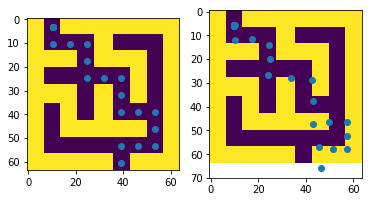

Train Epoch: 50 [79/80 (99%)] EnvLoss: 0.051826  RMSELoss: 5.160514 TotalLoss: 5.160514


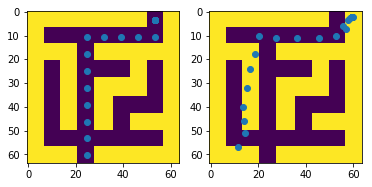

Train Epoch: 51 [79/80 (99%)] EnvLoss: 0.036937  RMSELoss: 5.279533 TotalLoss: 5.279533


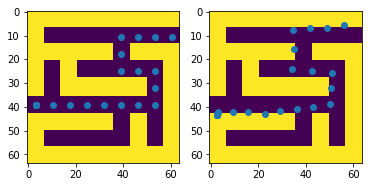

Train Epoch: 52 [79/80 (99%)] EnvLoss: 0.055071  RMSELoss: 5.449410 TotalLoss: 5.449410


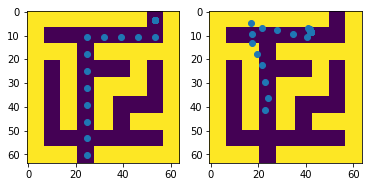

Train Epoch: 53 [79/80 (99%)] EnvLoss: 0.049008  RMSELoss: 5.145373 TotalLoss: 5.145373


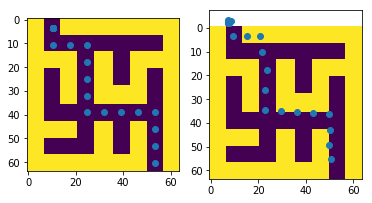

Train Epoch: 54 [79/80 (99%)] EnvLoss: 0.025552  RMSELoss: 4.990560 TotalLoss: 4.990560


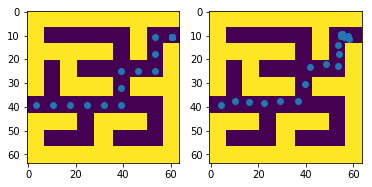

Train Epoch: 55 [79/80 (99%)] EnvLoss: 0.044906  RMSELoss: 4.692170 TotalLoss: 4.692170


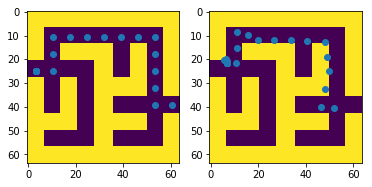

Train Epoch: 56 [79/80 (99%)] EnvLoss: 0.071798  RMSELoss: 5.332604 TotalLoss: 5.332604


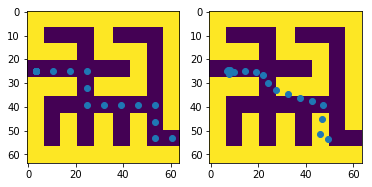

Train Epoch: 57 [79/80 (99%)] EnvLoss: 0.047837  RMSELoss: 4.780812 TotalLoss: 4.780812


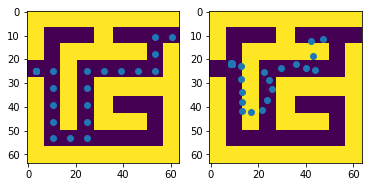

Train Epoch: 58 [79/80 (99%)] EnvLoss: 0.072814  RMSELoss: 4.959592 TotalLoss: 4.959592


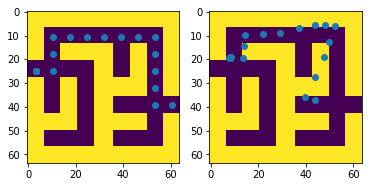

Train Epoch: 59 [79/80 (99%)] EnvLoss: 0.035550  RMSELoss: 4.806689 TotalLoss: 4.806689


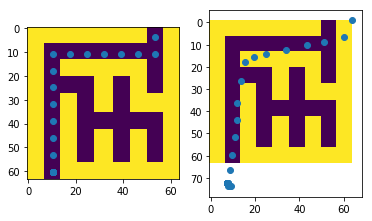

Train Epoch: 60 [79/80 (99%)] EnvLoss: 0.046114  RMSELoss: 4.923717 TotalLoss: 4.923717


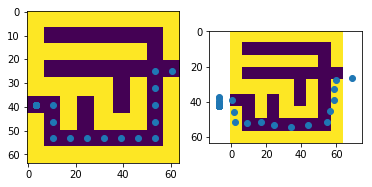

Train Epoch: 61 [79/80 (99%)] EnvLoss: 0.035621  RMSELoss: 4.637305 TotalLoss: 4.637305


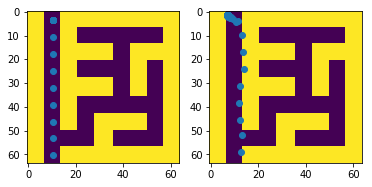

Train Epoch: 62 [79/80 (99%)] EnvLoss: 0.051064  RMSELoss: 4.942382 TotalLoss: 4.942382


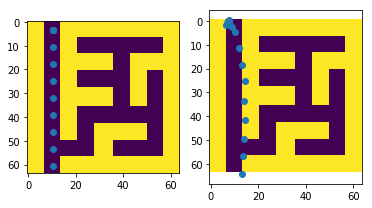

Train Epoch: 63 [79/80 (99%)] EnvLoss: 0.059851  RMSELoss: 4.098155 TotalLoss: 4.098155


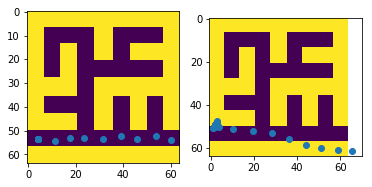

Train Epoch: 64 [79/80 (99%)] EnvLoss: 0.049986  RMSELoss: 4.756111 TotalLoss: 4.756111


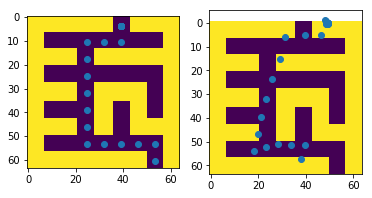

Train Epoch: 65 [79/80 (99%)] EnvLoss: 0.046982  RMSELoss: 4.754951 TotalLoss: 4.754951


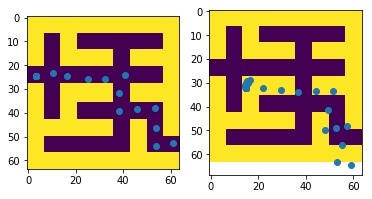

Train Epoch: 66 [79/80 (99%)] EnvLoss: 0.069029  RMSELoss: 5.425464 TotalLoss: 5.425464


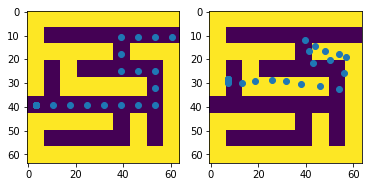

Train Epoch: 67 [79/80 (99%)] EnvLoss: 0.031619  RMSELoss: 4.437678 TotalLoss: 4.437678


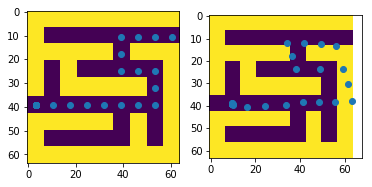

Train Epoch: 68 [79/80 (99%)] EnvLoss: 0.050539  RMSELoss: 4.913589 TotalLoss: 4.913589


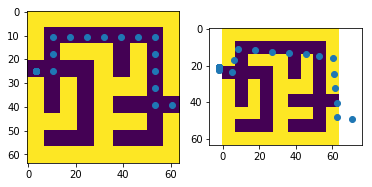

Train Epoch: 69 [79/80 (99%)] EnvLoss: 0.051378  RMSELoss: 4.686011 TotalLoss: 4.686011


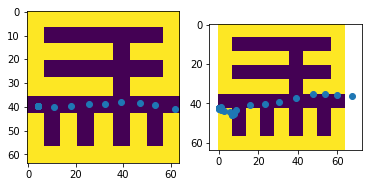

Train Epoch: 70 [79/80 (99%)] EnvLoss: 0.030406  RMSELoss: 4.691978 TotalLoss: 4.691978


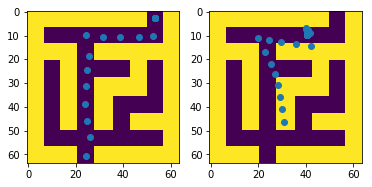

Train Epoch: 71 [79/80 (99%)] EnvLoss: 0.032910  RMSELoss: 4.664914 TotalLoss: 4.664914


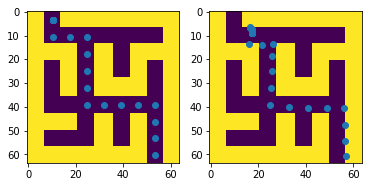

Train Epoch: 72 [79/80 (99%)] EnvLoss: 0.041402  RMSELoss: 3.938054 TotalLoss: 3.938054


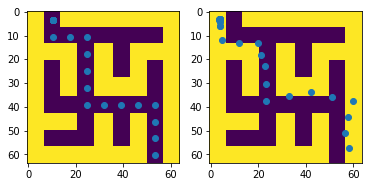

Train Epoch: 73 [79/80 (99%)] EnvLoss: 0.050083  RMSELoss: 5.299903 TotalLoss: 5.299903


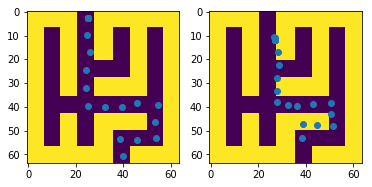

Train Epoch: 74 [79/80 (99%)] EnvLoss: 0.014261  RMSELoss: 4.276141 TotalLoss: 4.276141


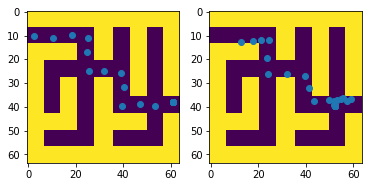

Train Epoch: 75 [79/80 (99%)] EnvLoss: 0.042949  RMSELoss: 4.548024 TotalLoss: 4.548024


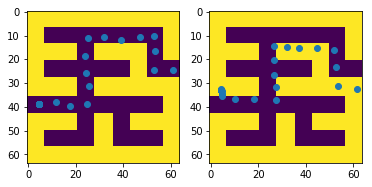

Train Epoch: 76 [79/80 (99%)] EnvLoss: 0.037242  RMSELoss: 4.101427 TotalLoss: 4.101427


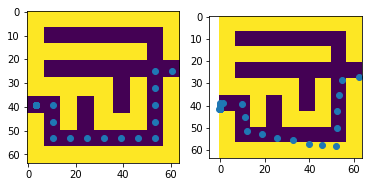

Train Epoch: 77 [79/80 (99%)] EnvLoss: 0.016571  RMSELoss: 4.596019 TotalLoss: 4.596019


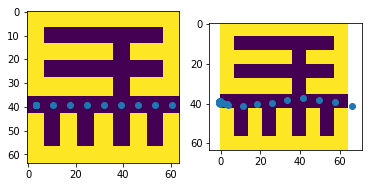

Train Epoch: 78 [79/80 (99%)] EnvLoss: 0.058120  RMSELoss: 4.745198 TotalLoss: 4.745198


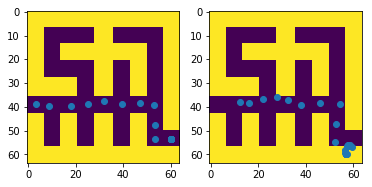

Train Epoch: 79 [79/80 (99%)] EnvLoss: 0.026164  RMSELoss: 4.675169 TotalLoss: 4.675169


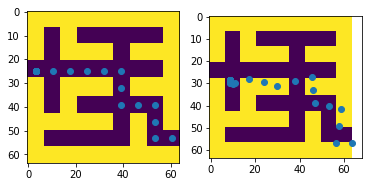

Train Epoch: 80 [79/80 (99%)] EnvLoss: 0.024917  RMSELoss: 3.883953 TotalLoss: 3.883953


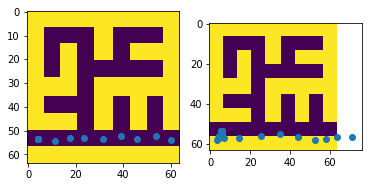

Train Epoch: 81 [79/80 (99%)] EnvLoss: 0.064806  RMSELoss: 4.257304 TotalLoss: 4.257304


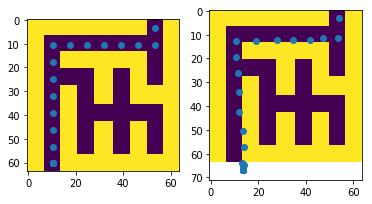

Train Epoch: 82 [79/80 (99%)] EnvLoss: 0.029773  RMSELoss: 4.464473 TotalLoss: 4.464473


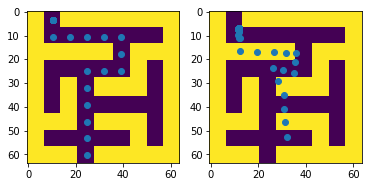

Train Epoch: 83 [79/80 (99%)] EnvLoss: 0.016090  RMSELoss: 4.204748 TotalLoss: 4.204748


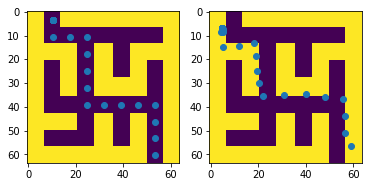

Train Epoch: 84 [79/80 (99%)] EnvLoss: 0.048176  RMSELoss: 4.498865 TotalLoss: 4.498865


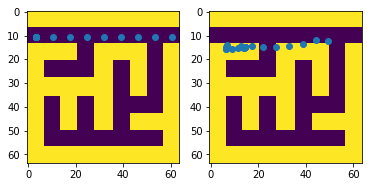

Train Epoch: 85 [79/80 (99%)] EnvLoss: 0.053090  RMSELoss: 4.984150 TotalLoss: 4.984150


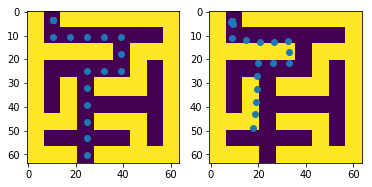

Train Epoch: 86 [79/80 (99%)] EnvLoss: 0.043613  RMSELoss: 4.476855 TotalLoss: 4.476855


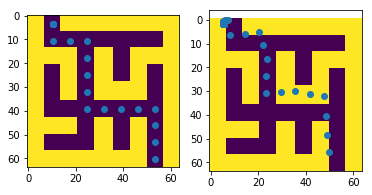

Train Epoch: 87 [79/80 (99%)] EnvLoss: 0.048558  RMSELoss: 4.904202 TotalLoss: 4.904202


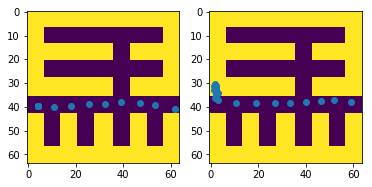

Train Epoch: 88 [79/80 (99%)] EnvLoss: 0.014278  RMSELoss: 4.158116 TotalLoss: 4.158116


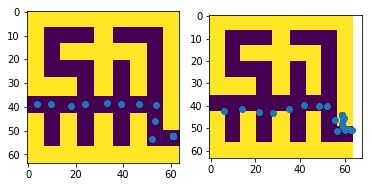

Train Epoch: 89 [79/80 (99%)] EnvLoss: 0.025047  RMSELoss: 4.312945 TotalLoss: 4.312945


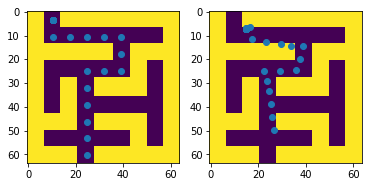

Train Epoch: 90 [79/80 (99%)] EnvLoss: 0.031207  RMSELoss: 4.368943 TotalLoss: 4.368943


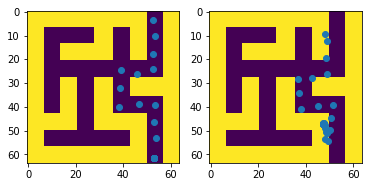

Train Epoch: 91 [79/80 (99%)] EnvLoss: 0.057823  RMSELoss: 4.136566 TotalLoss: 4.136566


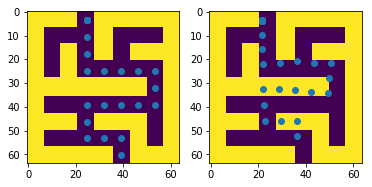

Train Epoch: 92 [79/80 (99%)] EnvLoss: 0.040250  RMSELoss: 4.515242 TotalLoss: 4.515242


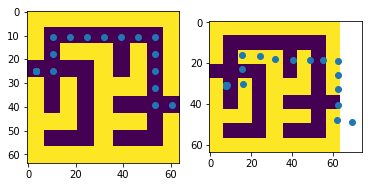

Train Epoch: 93 [79/80 (99%)] EnvLoss: 0.065401  RMSELoss: 4.538497 TotalLoss: 4.538497


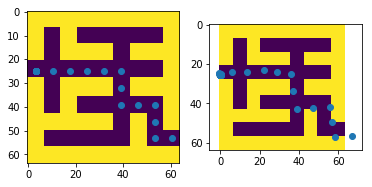

Train Epoch: 94 [79/80 (99%)] EnvLoss: 0.039821  RMSELoss: 4.254494 TotalLoss: 4.254494


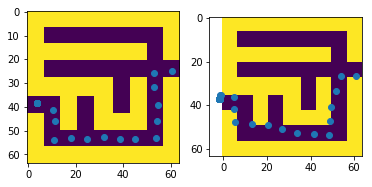

Train Epoch: 95 [79/80 (99%)] EnvLoss: 0.030486  RMSELoss: 4.586341 TotalLoss: 4.586341


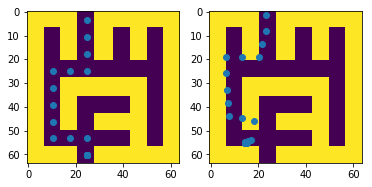

Train Epoch: 96 [79/80 (99%)] EnvLoss: 0.034779  RMSELoss: 4.756120 TotalLoss: 4.756120


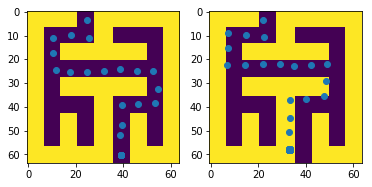

Train Epoch: 97 [79/80 (99%)] EnvLoss: 0.040203  RMSELoss: 4.249458 TotalLoss: 4.249458


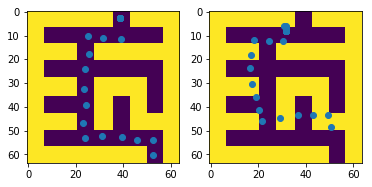

Train Epoch: 98 [79/80 (99%)] EnvLoss: 0.046816  RMSELoss: 4.022841 TotalLoss: 4.022841


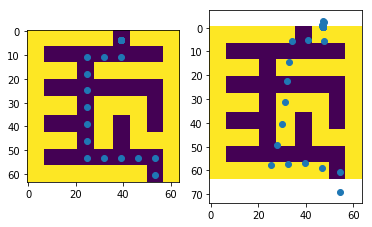

Train Epoch: 99 [79/80 (99%)] EnvLoss: 0.037494  RMSELoss: 3.976234 TotalLoss: 3.976234


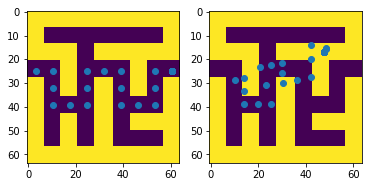

Train Epoch: 100 [79/80 (99%)] EnvLoss: 0.027944  RMSELoss: 4.365483 TotalLoss: 4.365483


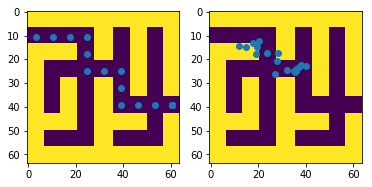

Train Epoch: 101 [79/80 (99%)] EnvLoss: 0.051655  RMSELoss: 4.994019 TotalLoss: 4.994019


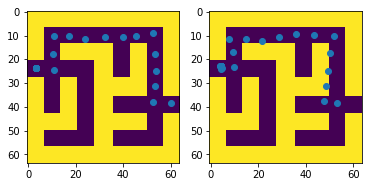

Train Epoch: 102 [79/80 (99%)] EnvLoss: 0.032151  RMSELoss: 4.237018 TotalLoss: 4.237018


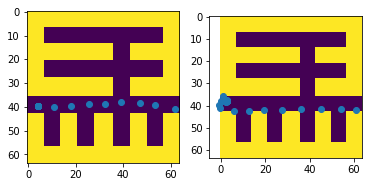

Train Epoch: 103 [79/80 (99%)] EnvLoss: 0.040567  RMSELoss: 4.368910 TotalLoss: 4.368910


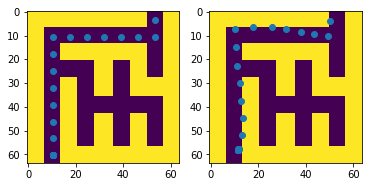

Train Epoch: 104 [79/80 (99%)] EnvLoss: 0.085580  RMSELoss: 4.241268 TotalLoss: 4.241268


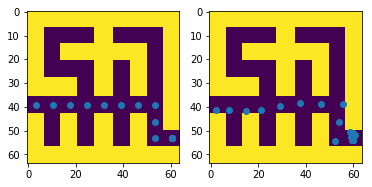

Train Epoch: 105 [79/80 (99%)] EnvLoss: 0.025803  RMSELoss: 4.164829 TotalLoss: 4.164829


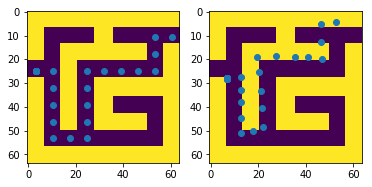

Train Epoch: 106 [79/80 (99%)] EnvLoss: 0.033886  RMSELoss: 4.285711 TotalLoss: 4.285711


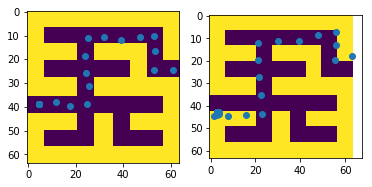

Train Epoch: 107 [79/80 (99%)] EnvLoss: 0.027382  RMSELoss: 4.461524 TotalLoss: 4.461524


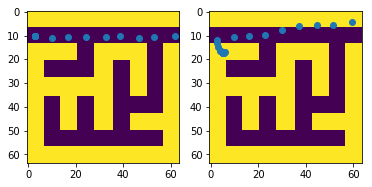

Train Epoch: 108 [79/80 (99%)] EnvLoss: 0.047124  RMSELoss: 4.176123 TotalLoss: 4.176123


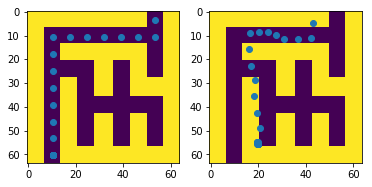

Train Epoch: 109 [79/80 (99%)] EnvLoss: 0.027939  RMSELoss: 4.412850 TotalLoss: 4.412850


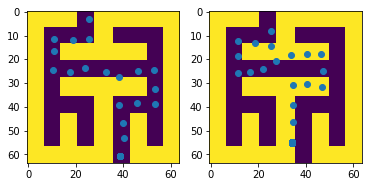

Train Epoch: 110 [79/80 (99%)] EnvLoss: 0.023690  RMSELoss: 4.015207 TotalLoss: 4.015207


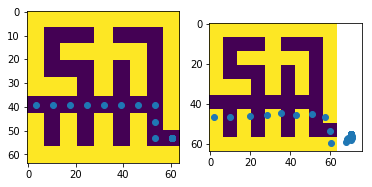

Train Epoch: 111 [79/80 (99%)] EnvLoss: 0.034390  RMSELoss: 4.318433 TotalLoss: 4.318433


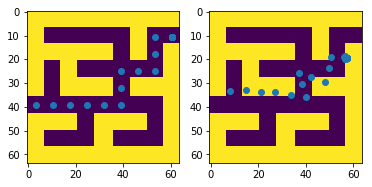

Train Epoch: 112 [79/80 (99%)] EnvLoss: 0.024309  RMSELoss: 4.260144 TotalLoss: 4.260144


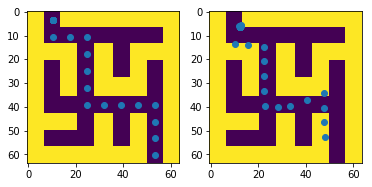

Train Epoch: 113 [79/80 (99%)] EnvLoss: 0.062782  RMSELoss: 4.259223 TotalLoss: 4.259223


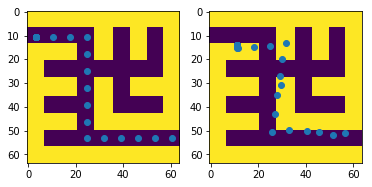

Train Epoch: 114 [79/80 (99%)] EnvLoss: 0.042724  RMSELoss: 4.233203 TotalLoss: 4.233203


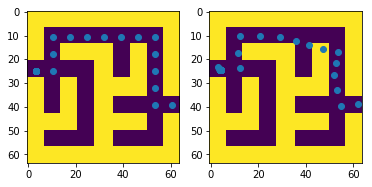

Train Epoch: 115 [79/80 (99%)] EnvLoss: 0.032035  RMSELoss: 4.308095 TotalLoss: 4.308095


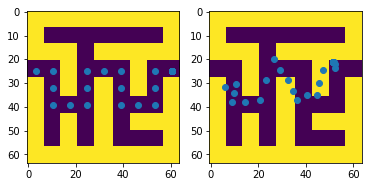

Train Epoch: 116 [79/80 (99%)] EnvLoss: 0.025465  RMSELoss: 4.610132 TotalLoss: 4.610132


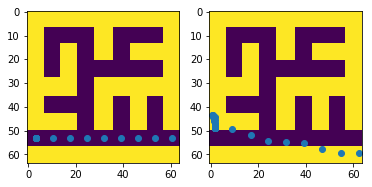

Train Epoch: 117 [79/80 (99%)] EnvLoss: 0.037605  RMSELoss: 4.036954 TotalLoss: 4.036954


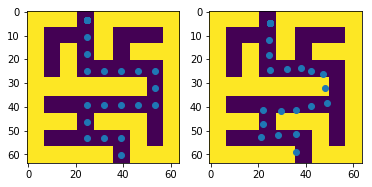

Train Epoch: 118 [79/80 (99%)] EnvLoss: 0.024686  RMSELoss: 3.983784 TotalLoss: 3.983784


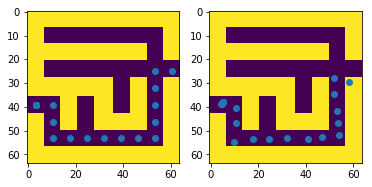

Train Epoch: 119 [79/80 (99%)] EnvLoss: 0.033643  RMSELoss: 4.032020 TotalLoss: 4.032020


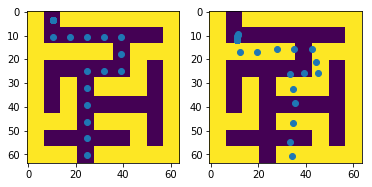

In [ ]:
net.train()
print('Init training loop...')

for epoch in range(1, epochs+1):
    iters = 0.0
    total_env = 0.0
    total_rmse = 0.0

    for batch_idx, (data, target, path, goals, expert_flag) in enumerate(trainloader):
        # Convert X, Y to Torch variables
        grid = data   # save numpy version of maze grid

        # Convert input and target to tensors
        data, target = Variable(data), Variable(target)
        data, target = data.to(device).float(), target.to(device).float()
 
        # Set gradient to zero
        optimizer.zero_grad()

        # Get network output
        output = net(data)

        # RMSE loss
        rmse_loss = rmse(output, target)
        r_loss = road_loss(torch.tensor(grid).reshape(64,64), output.reshape(-1,2).int())

        # Environmental Loss
        grid = grid[0][0].detach().numpy()
        #path = path[0].detach().numpy()
        #goals = goals[0].detach().numpy()
        output = output[0].detach().cpu().numpy()

        # Reconstruct predicted grids
        #pred_grid = torch.tensor(draw_solution_canvas(grid, output)).double().to(device)
        #pred_path = torch.tensor(draw_solution_canvas(path, output)).double().to(device)
        #pred_goals = torch.tensor(draw_goals_canvas(grid, output)).double().to(device)

        # Compute graphic losses
        # Wall loss
        #wall_loss = graphic_loss(torch.tensor(grid).to(device), pred_grid)
        # Path planning loss 
        #path_loss = graphic_loss(torch.tensor(path).to(device), pred_path)
        #path_loss = abs(wall_loss-path_loss)
        # Goals loss
        #goal_loss = graphic_loss(torch.tensor(goals).to(device), pred_goals)
        # Non-expert trajectory loss
        #env_loss = Variable((wall_loss + path_loss), requires_grad=True)/20 #
        
        # Final loss
        loss = rmse_loss #+ r_loss #+ Variable(wall_loss) #env_loss
        
        env_loss = r_loss #Variable(wall_loss)
    
        # Backpropagate loss & udpate gradient
        loss.backward()
        optimizer.step()

        # Print information
        iters += loss
        total_env += env_loss
        total_rmse+= rmse_loss

        print('Train Epoch: {} [{}/{} ({:.0f}%)] EnvLoss: {:.6f}  RMSELoss: {:.6f} TotalLoss: {:.6f}'.format(
                    epoch, batch_idx, len(trainloader.dataset),
                    100. * (batch_idx) / len(trainloader), 
                    total_env/len(trainloader), 
                    total_rmse/len(trainloader),
                    iters/len(trainloader)
                    ), 
                    end='\r', flush=True)
    print("")                                 
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(grid)
    ax[0].scatter(target[0][:,1], target[0][:,0])

    ax[1].imshow(grid)   
    ax[1].scatter(output[:,1], output[:,0])

    plt.show()


In [5]:
grid.shape

torch.Size([1, 1, 64, 64])

In [ ]:
#output
#plt.imshow(data.reshape(64,64))

In [ ]:
#output.reshape(-1,2)

In [ ]:

for i, (data, target, path, goals, expert_flag) in enumerate(testloader):
    # Convert input and target to tensors
    data, target = Variable(data), Variable(target)
    data, target = data.to(device).float(), target.to(device).float()
    # Get network output
    output = net(data)

    # RMSE loss
    rmse_loss = rmse(output, target)
    print(rmse_loss)
    
    #print(i)
    if i == 19:
        break


In [ ]:
plt.imshow(data[0][0])#output[:,:].detach().numpy())
plt.scatter(output[:,:,1].detach().numpy(), output[:,:,0].detach().numpy())

In [ ]:
plt.imshow(data[0][0])#output[:,:].detach().numpy())
plt.scatter(output[:,:,1].detach().numpy(), output[:,:,0].detach().numpy())

In [ ]:
plt.imshow(data[0][0])#output[:,:].detach().numpy())
plt.scatter(output[:,:,1].detach().numpy(), output[:,:,0].detach().numpy())

In [ ]:
plt.imshow(data[0][0])#output[:,:].detach().numpy())
plt.scatter(output[:,:,1].detach().numpy(), output[:,:,0].detach().numpy())

In [ ]:
plt.imshow(data[0][0])#output[:,:].detach().numpy())
plt.scatter(output[:,:,1].detach().numpy(), output[:,:,0].detach().numpy())